In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from ant_colony import AntColonyOptimization
import adjacency_mat_generator
from matplotlib.ticker import MaxNLocator
import seaborn as sns


In [3]:
n_ants_trials = [1, 5, 10, 20]
degradation_factor_trials = [0.1, 0.3, 0.5, 0.9]
n_iterations = [1, 5, 10, 50, 100]

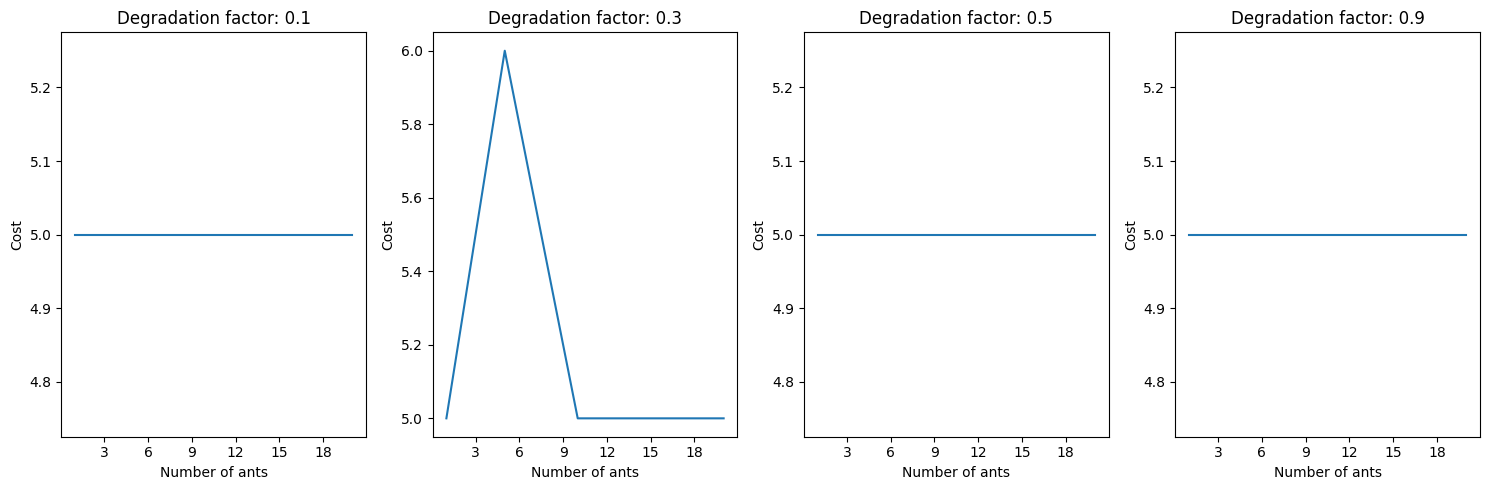

In [4]:
n_ants_cost = defaultdict(list)
for degradation_factor in degradation_factor_trials:
    for n_ants in n_ants_trials:
        aco = AntColonyOptimization(adjacency_mat_generator.adjacency_matrix_test2(), 5)
        cost = aco.optimize(50, n_ants, degradation_factor=degradation_factor)[1]
        n_ants_cost[str(degradation_factor)].append(cost)

fig, axs = plt.subplots(1, len(n_ants_cost.keys()), figsize=(15, 5))
for ax, key in zip(axs, n_ants_cost.keys()):
    ax.plot(n_ants_trials, n_ants_cost[key])
    ax.set_title(f'Degradation factor: {key}')
    ax.set_xlabel('Number of ants')
    ax.set_ylabel('Cost')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

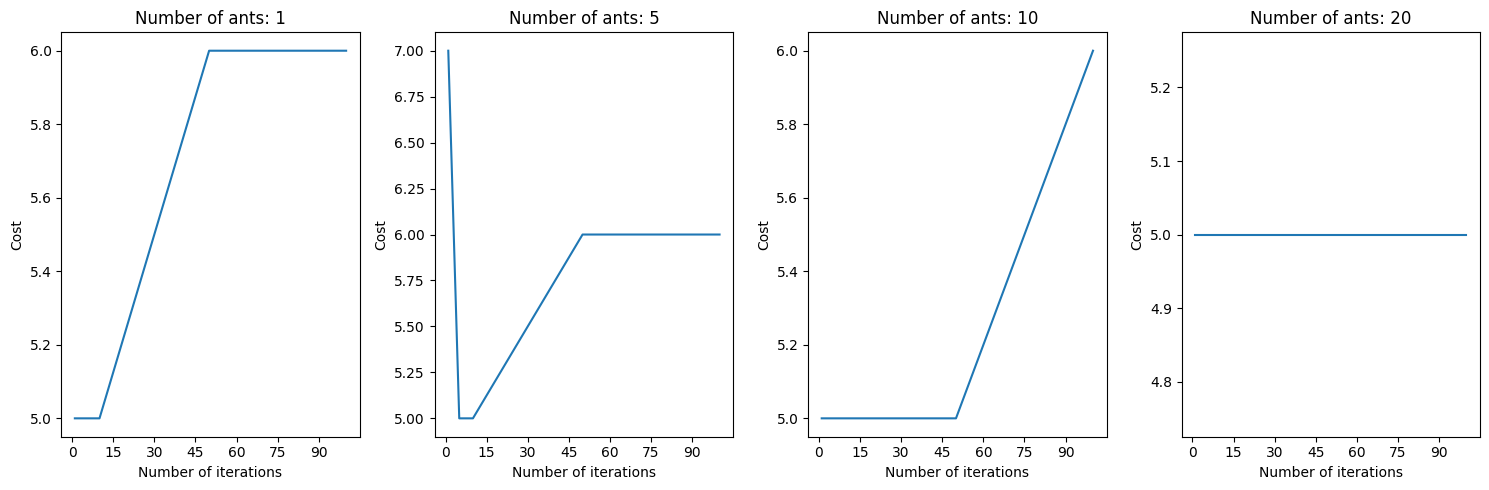

In [5]:
n_iterations_cost = defaultdict(list)
for n_ants in n_ants_trials:
    for n_iteration in n_iterations:
        aco = AntColonyOptimization(adjacency_mat_generator.adjacency_matrix_test2(), 5)
        cost = aco.optimize(n_iteration, n_ants, degradation_factor=0.3)[1]
        n_iterations_cost[str(n_ants)].append(cost)

fig, axs = plt.subplots(1, len(n_iterations_cost.keys()), figsize=(15, 5))
for ax, key in zip(axs, n_iterations_cost.keys()):
    ax.plot(n_iterations, n_iterations_cost[key])
    ax.set_title(f'Number of ants: {key}')
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Cost')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

<Axes: >

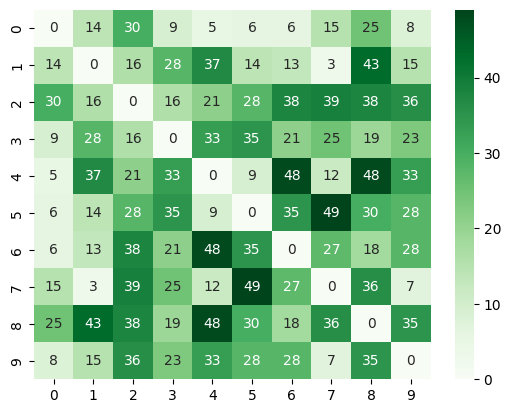

In [3]:
cities_10 = pd.read_csv('10_cities.csv')
sns.heatmap(cities_10.iloc[: , 1:], annot=True, cmap='Greens')

<Axes: >

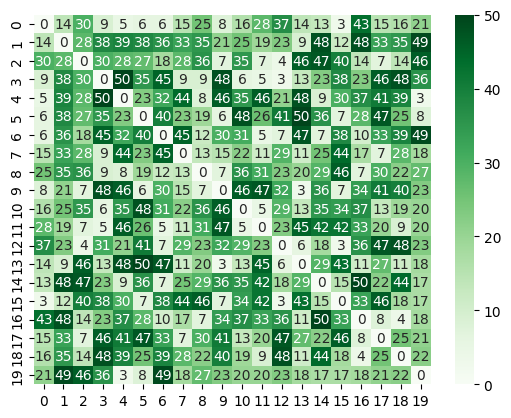

In [4]:
cities_20 = pd.read_csv('20_cities.csv')
cities_20['0'] = cities_20['0'].astype('int64')
sns.heatmap(cities_20.iloc[:,1:], annot=True, cmap='Greens')